Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
citybike = pd.read_csv('c:/users/patel/citybik.csv')
YLP = pd.read_csv('c:/users/patel/YLP_data.csv')
Foursqure = pd.read_csv('c:/users/patel/Foursquare_data.csv')
citybike.head()

,name,renting,returning,free_bikes,total_bikes,longitude,latitude,category
0,Ravenswood Ave & Lawrence Ave,1,1,3,5,-87.674237,41.969090,bike station
1,Lake Park Ave & 56th St,1,1,19,21,-87.587782,41.793242,bike station
2,Ada St & Washington Blvd,1,1,13,15,-87.661206,41.882830,bike station
3,Ashland Ave & Grace St,1,1,6,8,-87.668700,41.950687,bike station
4,Clark St & Wrightwood Ave,1,1,7,9,-87.643118,41.929546,bike station


In [3]:
citybike = citybike.rename(columns={'name': 'bike_station'})

In [4]:
citybike.head()

,bike_station,renting,returning,free_bikes,total_bikes,longitude,latitude,category
0,Ravenswood Ave & Lawrence Ave,1,1,3,5,-87.674237,41.969090,bike station
1,Lake Park Ave & 56th St,1,1,19,21,-87.587782,41.793242,bike station
2,Ada St & Washington Blvd,1,1,13,15,-87.661206,41.882830,bike station
3,Ashland Ave & Grace St,1,1,6,8,-87.668700,41.950687,bike station
4,Clark St & Wrightwood Ave,1,1,7,9,-87.643118,41.929546,bike station


In [5]:
YLP.head()

,bike_station,name,category,longitude,latitude,rating
0,Ravenswood Ave & Lawrence Ave,The Warbler,Pasta Shops,-87.685483,41.964226,4.5
1,Ravenswood Ave & Lawrence Ave,Gather,Wine Bars,-87.685364,41.964340,4.5
2,Ravenswood Ave & Lawrence Ave,Cinco Mexican Kitchen,Cocktail Bars,-87.673285,41.969006,4.5
3,Ravenswood Ave & Lawrence Ave,XOchimilco Mexican Restaurant,Mexican,-87.680250,41.961666,5.0
4,Ravenswood Ave & Lawrence Ave,Bar Roma,Bars,-87.668082,41.974496,4.5


In [6]:
Foursqure = Foursqure.rename(columns={'categories': 'category'})
Foursqure.head()

,bike_station,name,category,longitude,latitude
0,Ravenswood Ave & Lawrence Ave,Golden Nugget Pancake House,Restaurant,-87.673846,41.968641
1,Ravenswood Ave & Lawrence Ave,Budacki's Drive-In,Burger Joint,-87.678923,41.968111
2,Ravenswood Ave & Lawrence Ave,La Boulangerie Wilson,Restaurant,-87.678534,41.964818
3,Ravenswood Ave & Lawrence Ave,Spacca Napoli,Pizzeria,-87.673636,41.963199
4,Ravenswood Ave & Lawrence Ave,Bongo Room,American Restaurant,-87.668312,41.973316


In [7]:
POI = pd.concat([YLP, Foursqure], axis=0)
POI

,bike_station,name,category,longitude,latitude,rating
0,Ravenswood Ave & Lawrence Ave,The Warbler,Pasta Shops,-87.685483,41.964226,4.5
1,Ravenswood Ave & Lawrence Ave,Gather,Wine Bars,-87.685364,41.964340,4.5
2,Ravenswood Ave & Lawrence Ave,Cinco Mexican Kitchen,Cocktail Bars,-87.673285,41.969006,4.5
3,Ravenswood Ave & Lawrence Ave,XOchimilco Mexican Restaurant,Mexican,-87.680250,41.961666,5.0
4,Ravenswood Ave & Lawrence Ave,Bar Roma,Bars,-87.668082,41.974496,4.5
...,...,...,...,...,...,...
12603,Hastings LWS,Damenzo's Restaurant,Pizzeria,-87.684645,41.869139,NaN
12604,Hastings LWS,White Castle,Fast Food Restaurant,-87.685711,41.866864,NaN
12605,Hastings LWS,Bacci Pizzeria,Italian Restaurant,-87.683935,41.868909,NaN
12606,Hastings LWS,Ryhana's Cuisine,Fast Food Restaurant,-87.683063,41.868871,NaN


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [8]:
POI.dtypes

bike_station     object
name             object
category         object
longitude       float64
latitude        float64
rating          float64
dtype: object

In [9]:
# check for duplicates for name
nameUnique = len(set(POI.name))
nameTotal = POI.shape[0]
namedupe = nameTotal - nameUnique
print(namedupe)
# drop id col
#df_train.drop(['Id'],axis =1,inplace=True)

34632


In [10]:
POI = POI.drop_duplicates(subset=['name'], keep='first', ignore_index=True)

In [11]:
# check for duplicates for name
nameUnique = len(set(POI.name))
nameTotal = POI.shape[0]
namedupe = nameTotal - nameUnique
print(namedupe)

0


In [12]:
POI

,bike_station,name,category,longitude,latitude,rating
0,Ravenswood Ave & Lawrence Ave,The Warbler,Pasta Shops,-87.685483,41.964226,4.5
1,Ravenswood Ave & Lawrence Ave,Gather,Wine Bars,-87.685364,41.964340,4.5
2,Ravenswood Ave & Lawrence Ave,Cinco Mexican Kitchen,Cocktail Bars,-87.673285,41.969006,4.5
3,Ravenswood Ave & Lawrence Ave,XOchimilco Mexican Restaurant,Mexican,-87.680250,41.961666,5.0
4,Ravenswood Ave & Lawrence Ave,Bar Roma,Bars,-87.668082,41.974496,4.5
...,...,...,...,...,...,...
5648,Paulina St & Flournoy St,Rook's Lounge,Cocktail Bar,-87.666060,41.874351,NaN
5649,Ashland Ave & Chicago Ave,Beatnik,Cocktail Bar,-87.667542,41.896280,NaN
5650,Ashland Ave & Chicago Ave,Lush Wine & Spirits,Wine Bar,-87.663018,41.896281,NaN
5651,California Ave & 21st St,Fiesta Tapatia,Mexican Restaurant,-87.694950,41.852158,NaN


In [24]:

POI_grouped = POI.groupby(['bike_station']).agg({'rating': 'mean', 'name': 'count','category' :'count', 'longitude' : 'mean' , 'latitude' : 'mean' })

In [25]:
 POI_grouped = POI_grouped.reset_index()

In [26]:
POI_grouped

,bike_station,rating,name,category,longitude,latitude
0,2112 W Peterson Ave,3.833333,6,6,-87.682684,41.993200
1,63rd St Beach,1.666667,4,4,-87.592742,41.806100
2,900 W Harrison St,4.125000,9,9,-87.650788,41.881912
3,Aberdeen St & Monroe St,4.166667,4,4,-87.654823,41.881659
4,Aberdeen St & Randolph St,3.750000,2,2,-87.652700,41.885285
...,...,...,...,...,...,...
967,Woodlawn Ave & 55th St,4.166667,10,10,-87.597296,41.794545
968,Woodlawn Ave & 75th St,1.250000,3,3,-87.595405,41.758263
969,Woodlawn Ave & Lake Park Ave,3.500000,4,4,-87.594199,41.812841
970,Yates Blvd & 75th St,3.033333,19,19,-87.565698,41.760719


In [27]:
df = pd.merge(citybike, POI_grouped, on='bike_station')

In [28]:
df

,bike_station,renting,returning,free_bikes,total_bikes,longitude_x,latitude_x,category_x,rating,name,category_y,longitude_y,latitude_y
0,Ravenswood Ave & Lawrence Ave,1,1,3,5,-87.674237,41.969090,bike station,4.325000,29,29,-87.675768,41.967429
1,Lake Park Ave & 56th St,1,1,19,21,-87.587782,41.793242,bike station,3.900000,20,20,-87.589782,41.796849
2,Ada St & Washington Blvd,1,1,13,15,-87.661206,41.882830,bike station,4.075000,23,23,-87.657258,41.884466
3,Ashland Ave & Grace St,1,1,6,8,-87.668700,41.950687,bike station,4.175000,24,24,-87.667896,41.948436
4,Clark St & Wrightwood Ave,1,1,7,9,-87.643118,41.929546,bike station,4.300000,25,25,-87.643348,41.930288
...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,Michigan Ave & 18th St,1,1,2,4,-87.624550,41.857813,bike station,4.500000,1,1,-87.626000,41.857690
968,Michigan Ave & Lake St,1,1,5,7,-87.624398,41.886022,bike station,3.500000,1,1,-87.625557,41.887516
969,Halsted St & Fulton St,1,1,9,11,-87.648089,41.886871,bike station,4.000000,2,2,-87.649202,41.886749
970,Lincoln Ave & Byron St,1,1,5,7,-87.677296,41.952372,bike station,3.666667,3,3,-87.677492,41.952933


In [29]:
df = df.rename(columns={'name': 'POI_count'})
df

,bike_station,renting,returning,free_bikes,total_bikes,longitude_x,latitude_x,category_x,rating,POI_count,category_y,longitude_y,latitude_y
0,Ravenswood Ave & Lawrence Ave,1,1,3,5,-87.674237,41.969090,bike station,4.325000,29,29,-87.675768,41.967429
1,Lake Park Ave & 56th St,1,1,19,21,-87.587782,41.793242,bike station,3.900000,20,20,-87.589782,41.796849
2,Ada St & Washington Blvd,1,1,13,15,-87.661206,41.882830,bike station,4.075000,23,23,-87.657258,41.884466
3,Ashland Ave & Grace St,1,1,6,8,-87.668700,41.950687,bike station,4.175000,24,24,-87.667896,41.948436
4,Clark St & Wrightwood Ave,1,1,7,9,-87.643118,41.929546,bike station,4.300000,25,25,-87.643348,41.930288
...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,Michigan Ave & 18th St,1,1,2,4,-87.624550,41.857813,bike station,4.500000,1,1,-87.626000,41.857690
968,Michigan Ave & Lake St,1,1,5,7,-87.624398,41.886022,bike station,3.500000,1,1,-87.625557,41.887516
969,Halsted St & Fulton St,1,1,9,11,-87.648089,41.886871,bike station,4.000000,2,2,-87.649202,41.886749
970,Lincoln Ave & Byron St,1,1,5,7,-87.677296,41.952372,bike station,3.666667,3,3,-87.677492,41.952933


In [38]:
data = pd.read_csv("c:/users/patel/join_data.csv")
data.head()

,bike_station,renting,returning,free_bikes,total_bikes,longitude_x,latitude_x,category_x,rating,POI_count,category_y,longitude_y,latitude_y
0,Ravenswood Ave & Lawrence Ave,1,1,3,5,-87.674237,41.969090,bike station,4.325,29,29,-87.675768,41.967429
1,Lake Park Ave & 56th St,1,1,19,21,-87.587782,41.793242,bike station,3.900,20,20,-87.589782,41.796849
2,Ada St & Washington Blvd,1,1,13,15,-87.661206,41.882830,bike station,4.075,23,23,-87.657258,41.884466
3,Ashland Ave & Grace St,1,1,6,8,-87.668700,41.950687,bike station,4.175,24,24,-87.667896,41.948436
4,Clark St & Wrightwood Ave,1,1,7,9,-87.643118,41.929546,bike station,4.300,25,25,-87.643348,41.930288


In [39]:
data.describe()

,renting,returning,free_bikes,total_bikes,longitude_x,latitude_x,rating,POI_count,category_y,longitude_y,latitude_y
count,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,884.000000,972.000000,972.000000,972.000000,972.000000
mean,0.997942,0.997942,4.184156,6.180041,-87.670781,41.858618,3.233362,5.815844,5.815844,-87.676500,41.857638
std,0.045338,0.045338,4.266367,4.271368,0.055151,0.087879,1.391453,5.852815,5.852815,0.172328,0.098152
min,0.000000,0.000000,0.000000,0.000000,-87.829258,41.651868,0.000000,1.000000,1.000000,-92.763643,40.477442
25%,1.000000,1.000000,0.000000,2.000000,-87.705696,41.789459,2.666667,2.000000,2.000000,-87.706361,41.791518
50%,1.000000,1.000000,3.000000,5.000000,-87.668790,41.877375,3.833333,3.000000,3.000000,-87.668605,41.877846
75%,1.000000,1.000000,7.000000,9.000000,-87.632976,41.924597,4.125000,8.000000,8.000000,-87.632971,41.924875
max,1.000000,1.000000,27.000000,29.000000,-87.528232,42.064854,5.000000,29.000000,29.000000,-87.520655,42.066116


<Axes: xlabel='total_bikes', ylabel='Count'>

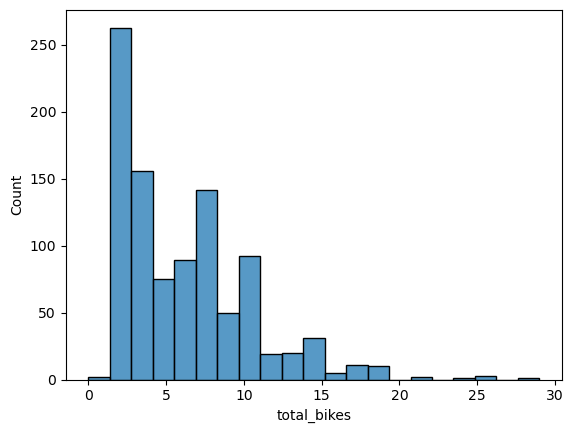

In [40]:
# histogram
X = data['total_bikes']
sns.histplot(X)

In the graph above we can observe the following things: - It is not a normal distribution. - It's has negative correlation with number of total bike and count. - It has some outliers (e.g. having huge number of available bikes).

<Axes: xlabel='total_bikes', ylabel='POI_count'>

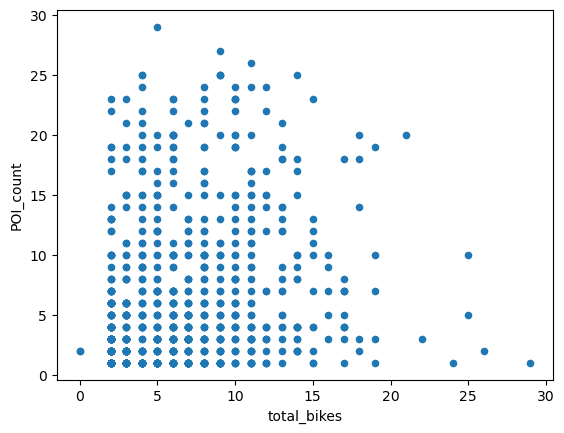

In [42]:
data.plot.scatter(x='total_bikes', y='POI_count', legend=None)

In this scatter plot we observed following things:
    1.number of available bikes is between 2 to 15 for most POI areas..
    2.we have few outliners.
    3.POI count has negative relation with total_bikes.

In [43]:
data[data['total_bikes'] > 20]

,bike_station,renting,returning,free_bikes,total_bikes,longitude_x,latitude_x,category_x,rating,POI_count,category_y,longitude_y,latitude_y
1,Lake Park Ave & 56th St,1,1,19,21,-87.587782,41.793242,bike station,3.900000,20,20,-87.589782,41.796849
122,Michigan Ave & 8th St,1,1,23,25,-87.623981,41.872773,bike station,3.700000,10,10,-87.626002,41.872750
242,DuSable Lake Shore Dr & Monroe St,1,1,23,25,-87.616743,41.880958,bike station,4.000000,5,5,-87.622769,41.885166
368,Desplaines St & Kinzie St,1,1,22,24,-87.644448,41.888716,bike station,4.000000,1,1,-87.647880,41.886660
381,Dearborn St & Erie St,1,1,24,26,-87.629318,41.893992,bike station,3.500000,2,2,-87.630017,41.893585
408,Halsted St & Dickens Ave,1,1,20,22,-87.648830,41.919936,bike station,4.166667,3,3,-87.648871,41.919216
939,Buckingham Fountain,1,1,27,29,-87.620339,41.876423,bike station,4.500000,1,1,-87.618958,41.875810


C:\Users\patel\AppData\Local\Temp\ipykernel_21000\1615926394.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


<Axes: >

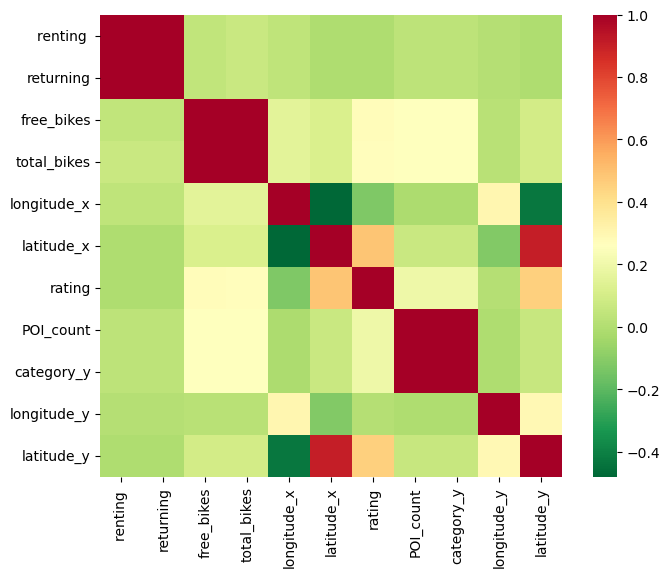

In [44]:
# correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corrmat, vmax=1, square=True,cmap="RdYlGn_r")

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [45]:
import sqlite3
import os
from sqlite3 import Error

In [46]:
conn = sqlite3.connect("C:/Users/patel/lighthouse-lab-allprojects/Statistical-Modelling-Project/Modelling.db")


In [47]:
df.to_sql('join_data1', conn, if_exists='replace', index=False)

972

Look at the data before and after the join to validate your data.

1.Before joining data I have same information about same place in two diffrent table

2.After Joining Data I have combine information from all three data and I can remove all duplicates.

3.I also can do data visualization better after joining data.

4.JOined data frame have all information we have in three diffrent data frames.